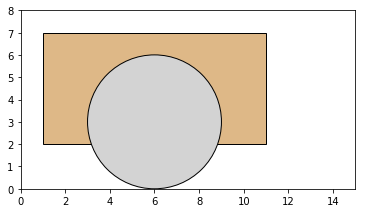

In [7]:
import matplotlib. pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, aspect="equal")
W,H = 15,8
ax.set_xlim ([0,W])
ax.set_ylim ([0,H])
x,y,w,h = 1,2,10,5
rect = plt.Rectangle((x,y),w,h,fc="burlywood",ec="black")
ax.add_patch(rect)
center,r = (6,3),3
circ = plt.Circle(center,r,fc="lightgray",ec="black")
ax.add_patch( circ)
plt.show()
# fig.savefig ("picture.eps")

In [14]:
def bl_candidates(i,x,y,w,h):
    cand=[(0,0)]
    for j in range(i):
        for k in range(j):
            cand += [(x[j]+w[j], y[k]+h[k])]
            cand += [(x[k]+w[k], y[j]+h[j])]
    for j in range(i):
        cand += [(0, y[j]+h[j])]
        cand += [(x[j]+w[j], 0)]
    print(cand)
    return cand


def is_feas(i,p,x,y,w,h,W):
    if p[0] < 0 or W < p[0]+w[i]:
        return False
    for j in range(i):
        if max(p[0],x[j]) < min(p[0]+w[i],x[j]+w[j]):
            if max(p[1],y[j]) < min(p[1]+h[i],y[j]+h[j]):
                return False
    return True


def BL_method(w,h,W):
    x,y=[],[]
    for i in range(len(w)):
        blfp=[]
        cand = bl_candidates(i,x,y,w,h)
        for p in cand:
            if is_feas(i,p,x,y,w,h,W):
                blfp += [p]
        min_p = min(blfp, key=lambda v:(v[1],v[0]))
        x += [min_p[0]]
        y += [min_p[1]]
    return x,y

w=[9, 4, 4, 7, 5]
h=[4, 10, 9, 9, 10]
W=20
x,y=BL_method(w,h,W)

[(0, 0)]
[(0, 0), (0, 4), (9, 0)]
[(0, 0), (13, 4), (9, 10), (0, 4), (9, 0), (0, 10), (13, 0)]
[(0, 0), (13, 4), (9, 10), (17, 4), (9, 9), (17, 10), (13, 9), (0, 4), (9, 0), (0, 10), (13, 0), (0, 9), (17, 0)]
[(0, 0), (13, 4), (9, 10), (17, 4), (9, 9), (17, 10), (13, 9), (7, 4), (9, 13), (7, 10), (13, 13), (7, 9), (17, 13), (0, 4), (9, 0), (0, 10), (13, 0), (0, 9), (17, 0), (0, 13), (7, 0)]


In [11]:
x

[0, 9, 13, 0, 13]

In [12]:
y

[0, 0, 0, 4, 9]